In [1]:
import matplotlib.pyplot as plt
import nbodykit.lab as nb

In [2]:
plt.rc('font', size=18)

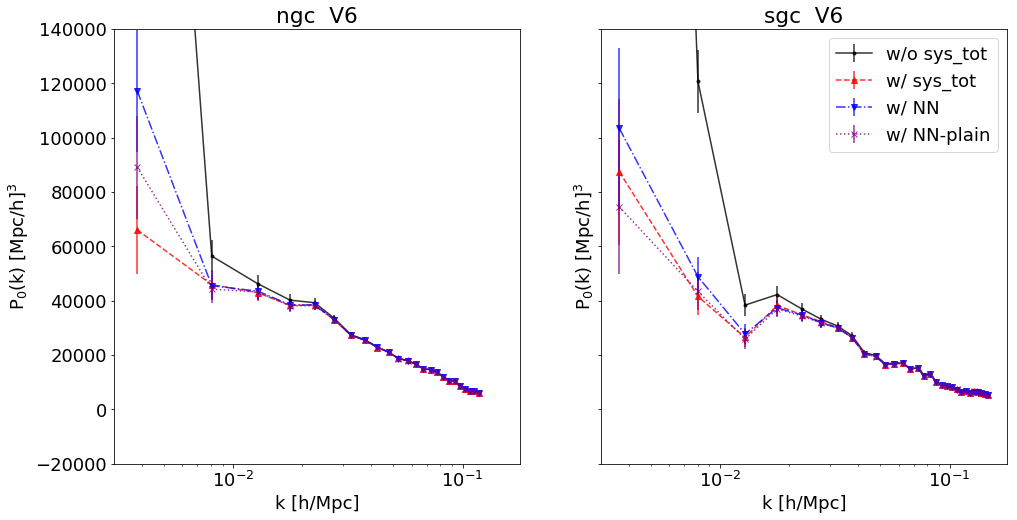

In [3]:
ttl = ['w/o sys_tot', 'w/ sys_tot', 'w/ NN ', 'w/ NN-plain']
c   = ['k', 'r', 'b', 'purple']
ls  = ['-', '--', '-.', ':']
mk  = ['.', '^', 'v', 'x']
fig, ax = plt.subplots(ncols=2, figsize=(16, 8), sharey=True, sharex=True)

for j,cap in enumerate(['ngc', 'sgc']):
    path = '/Volumes/TimeMachine/data/eboss/v6/results_'+cap+'/clustering/'
    wsystot     = nb.ConvolvedFFTPower.load(path + 'pk_256_p8_2p2_wsystot')
    wsystotnn   = nb.ConvolvedFFTPower.load(path + 'pk_256_p8_2p2_wsystotnn')
    wsystotnnp  = nb.ConvolvedFFTPower.load(path + 'pk_256_p8_2p2_wsystotnnp')
    wosystot    = nb.ConvolvedFFTPower.load(path + 'pk_256_p8_2p2_wosystot')
    for i,data in enumerate([wosystot, wsystot, wsystotnn, wsystotnnp]):    
        err = data.poles['power_0'].real/(0.5*data.poles['modes'])**0.5
        ax[j].errorbar(data.poles['k'], data.poles['power_0'].real-data.attrs['shotnoise'], yerr=err,
                    label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.8)
    # j = 0, 1
    ax[j].set_xscale('log')
    ax[j].set_ylim(-2e4, 14e4)
    ax[j].set_ylabel(r'P$_{0}$(k) [Mpc/h]$^{3}$')
    ax[j].set_xlabel(r'k [h/Mpc]')
    ax[j].set_title(cap + '  V6')
    if j == 1:ax[j].legend()

P_2

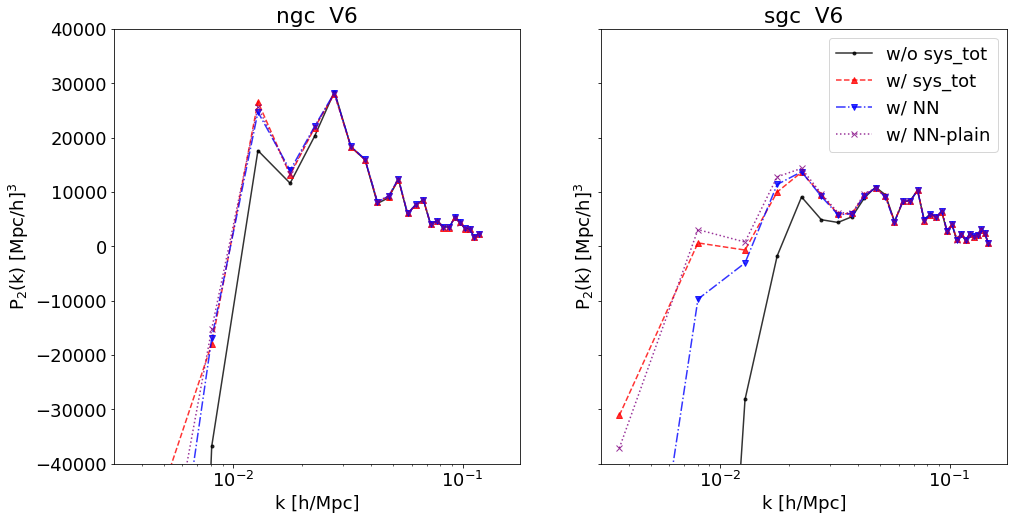

In [4]:
ttl = ['w/o sys_tot', 'w/ sys_tot', 'w/ NN ', 'w/ NN-plain']
c   = ['k', 'r', 'b', 'purple']
ls  = ['-', '--', '-.', ':']
mk  = ['.', '^', 'v', 'x']
fig, ax = plt.subplots(ncols=2, figsize=(16, 8), sharey=True, sharex=True)

for j,cap in enumerate(['ngc', 'sgc']):
    path = '/Volumes/TimeMachine/data/eboss/v6/results_'+cap+'/clustering/'
    wsystot     = nb.ConvolvedFFTPower.load(path + 'pk_256_p8_2p2_wsystot')
    wsystotnn   = nb.ConvolvedFFTPower.load(path + 'pk_256_p8_2p2_wsystotnn')
    wsystotnnp  = nb.ConvolvedFFTPower.load(path + 'pk_256_p8_2p2_wsystotnnp')
    wosystot    = nb.ConvolvedFFTPower.load(path + 'pk_256_p8_2p2_wosystot')
    for i,data in enumerate([wosystot, wsystot, wsystotnn, wsystotnnp]):    
        #err = data.poles['power_2'].real/(0.5*data.poles['modes'])**0.5
        ax[j].plot(data.poles['k'], data.poles['power_2'].real,
                    label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.8)
    # j = 0, 1
    ax[j].set_xscale('log')
    ax[j].set_ylim(-4e4, 4e4)
    ax[j].set_ylabel(r'P$_{2}$(k) [Mpc/h]$^{3}$')
    ax[j].set_xlabel(r'k [h/Mpc]')
    ax[j].set_title(cap + '  V6')
    if j == 1:ax[j].legend()

In [4]:
import fitsio as ft
from glob import glob

In [5]:
cats = glob('/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_*.dat.fits')
cats, len(cats)

(['/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6.dat.fits',
  '/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6_wnn.dat.fits',
  '/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6_wnnp.dat.fits',
  '/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6.dat.fits',
  '/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6_wnn.dat.fits',
  '/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6_wnnp.dat.fits'],
 6)

In [6]:
for cati in cats:
    catd = ft.read(cati)
    systot = catd['WEIGHT_SYSTOT']
    print(systot.min(), systot.max())

0.8497019275469969 1.4844180349652736
0.9012291501326749 2.0
0.892104021863963 2.0
1.0277115837281166e-30 1.5570564289971904
0.8465537717563315 2.0
0.8415949626794017 2.0


In [31]:
cats = glob('/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_*_v6.dat.fits')

In [27]:
files = glob('/Volumes/TimeMachine/data/eboss/sysmaps/eboss_nobs/eBOSS_eboss*_band_g_nside256_oversamp4_count__total.fits.gz')
files

['/Volumes/TimeMachine/data/eboss/sysmaps/eboss_nobs/eBOSS_eboss21_band_g_nside256_oversamp4_count__total.fits.gz',
 '/Volumes/TimeMachine/data/eboss/sysmaps/eboss_nobs/eBOSS_eboss22_band_g_nside256_oversamp4_count__total.fits.gz',
 '/Volumes/TimeMachine/data/eboss/sysmaps/eboss_nobs/eBOSS_eboss23_band_g_nside256_oversamp4_count__total.fits.gz',
 '/Volumes/TimeMachine/data/eboss/sysmaps/eboss_nobs/eBOSS_eboss25_band_g_nside256_oversamp4_count__total.fits.gz']

In [28]:
import sys
sys.path.append('/Users/rezaie/github/SYSNet/src')

In [15]:
import utils as ut

/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6.dat.fits
/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6.dat.fits
/Volumes/TimeMachine/data/eboss/sysmaps/eboss_nobs/eBOSS_eboss21_band_g_nside256_oversamp4_count__total.fits.gz
/Volumes/TimeMachine/data/eboss/sysmaps/eboss_nobs/eBOSS_eboss22_band_g_nside256_oversamp4_count__total.fits.gz
/Volumes/TimeMachine/data/eboss/sysmaps/eboss_nobs/eBOSS_eboss23_band_g_nside256_oversamp4_count__total.fits.gz
/Volumes/TimeMachine/data/eboss/sysmaps/eboss_nobs/eBOSS_eboss25_band_g_nside256_oversamp4_count__total.fits.gz


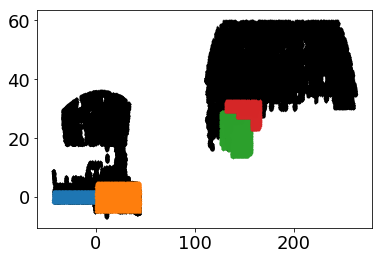

In [35]:
for c in cats:
    print(c)
    catd = ft.read(c)
    gt = catd['RA'] > 300
    catd['RA'][gt] -= 360
    plt.scatter(catd['RA'], catd['DEC'], 1., marker='.', color='k', alpha=0.5)   

for f in files:
    print(f)
    d = ft.read(f)
    ra, dec = ut.hpix2radec(256, d['PIXEL'])
    gt = ra > 300
    ra[gt] -= 360
    plt.scatter(ra, dec, 1.0, marker='.')